<a href="https://colab.research.google.com/github/Keita062/work/blob/main/(12_17).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
def generation ( dsize = 50 ,dvar = 1 ,xmin = 0 , xmax = 10  ):
  pa = np.random.rand() * 10
  pb = np.random.rand()*10-5
  if np.random.rand() > .5 :
    pa = pa * -1
  xs = np.random.rand( dsize )*( xmax - xmin )+xmin
  dvars = np.random.normal( 0 , dvar , dsize )
  ys = pa*xs+dvars
  return [xs,ys]

In [6]:
x , y = generation(100 , 10 , 0 ,10)

In [7]:
print(x)
print(y)

[5.46924409 6.3741204  6.4139416  7.84387835 0.70468606 4.56443701
 9.14675046 9.20706591 8.116333   4.75237137 6.20334585 8.80832847
 8.93939738 2.57053368 1.8562321  2.30263258 8.48638887 3.9094419
 0.32686763 7.431255   2.82980741 9.16212097 5.17693836 4.71426016
 9.07907127 8.60422358 6.6545563  4.62844864 5.86626709 1.18011926
 6.63111511 0.13274661 2.81496853 9.91318817 8.27209417 6.77145765
 2.7340512  8.19533748 3.42254771 4.55899728 9.55187692 3.28680929
 8.156669   1.89054177 5.06854168 1.33188615 5.14101947 4.58358375
 3.52759457 4.92541477 2.70004138 6.78154951 1.03597623 5.50520013
 5.14983926 3.82178515 6.72007482 3.27769702 5.23106601 8.89746326
 0.55110248 2.77047668 3.12252982 1.38276098 9.48276409 4.29621584
 3.62518242 2.50465765 4.72741052 5.90431968 9.21415679 9.76464966
 7.63059769 3.47177749 6.08186857 2.68526618 7.9772687  1.86433286
 0.50170083 6.74380179 5.01633745 7.31189491 3.38235804 8.33083729
 4.1903918  1.88731316 3.68207452 2.90607875 3.27461561 3.67219

In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x.reshape(-1,1),y.reshape(-1,1))

LinearRegression()

In [14]:
coef = lr.coef_[0][0]
itcp = lr.intercept_[0]
Rsq = lr.score(x.reshape(-1,1),y.reshape(-1,1))
print("説明変数の係数",itcp)
print("切片",coef)
print("決定係数",Rsq)

説明変数の係数 -0.5721778112478901
切片 -8.74793551437987
決定係数 0.8343002738157785


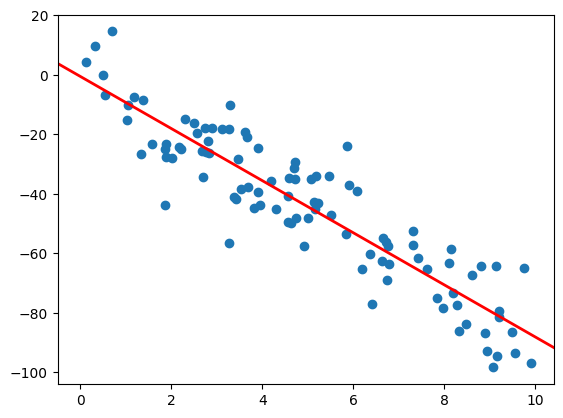

In [13]:
fig, ax = plt.subplots()
ax.scatter(x, y)

ax.axline((0, itcp), slope=coef, color="red", lw=2)

plt.show()


In [18]:
df = pd.read_csv("/content/nlReg01.csv")
print( df.head() )

   Unnamed: 0         X         Y
0           1  1.520924  1.341647
1           2  0.134963  0.894440
2           3  8.999615  0.765217
3           4  5.152303  0.513197
4           5  8.144007  0.849131


In [22]:
x = df["X"].to_numpy()
y = df["Y"].to_numpy()

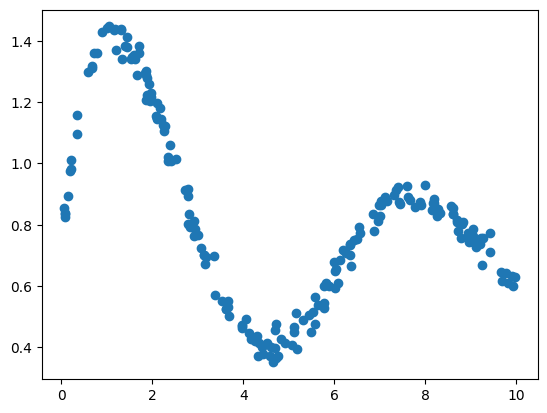

In [23]:
plt.scatter( x, y )

In [28]:
def get_parameters( x, a=1, b=1, c=3):
 y = a * (x + b)**2 + c
 return y

In [29]:
get_parameters(5)

39

Enter the value of a: 3
Enter the value of b: 2
Enter the value of c: 2


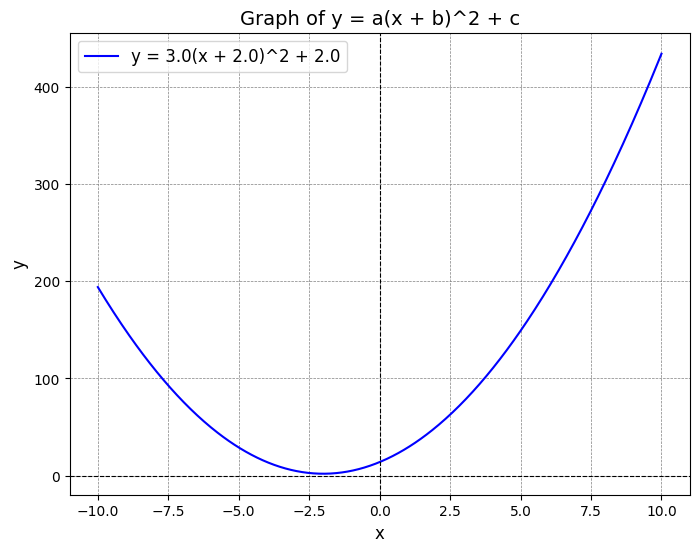

In [25]:
# 任意の a, b, c を入力させる
def get_parameters2():
    try:
        a = float(input("Enter the value of a: "))
        b = float(input("Enter the value of b: "))
        c = float(input("Enter the value of c: "))
    except ValueError:
        print("Invalid input. Please enter numeric values.")
        return get_parameters()
    return a, b, c

# パラメータ入力
a, b, c = get_parameters()

# x の範囲を設定
x = np.linspace(-10, 10, 500)

# 関数を計算
y = a * (x + b)**2 + c

# グラフを描画
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=f"y = {a}(x + {b})^2 + {c}", color='blue')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # x軸
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # y軸
plt.title("Graph of y = a(x + b)^2 + c", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.show()


In [36]:
def MS(x, a=1, b=0, c=0):
  return a*np.sin(x+b)+c

In [37]:
from scipy.optimize import curve_fit

In [62]:
XG =df["X"].to_numpy()
YG =df["Y"].to_numpy()

def model(x,a,b,c,d):
  return (a/(x+b))* np.sin ( x + c ) +d

In [63]:
params, cov = curve_fit(model,XG,YG)
params

array([1.69397581, 1.00730132, 0.00711928, 0.70118398])

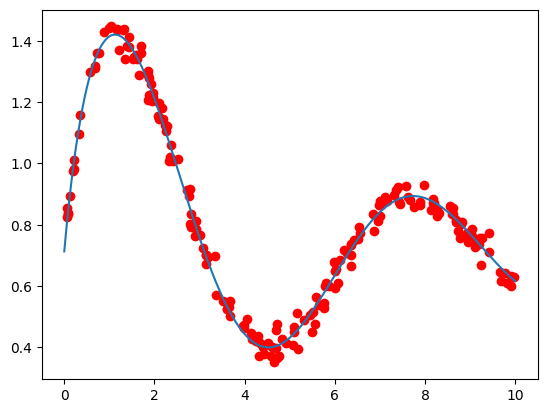

In [67]:
XA = np.linspace(0,10,10000)
YA = model(XA,params[0],params[1],params[2],params[3])

plt.plot(XA,YA)
plt.scatter(XG,YG,color="red")

In [69]:
ymean = np.mean(YA)

ymodel = model(XA,params[0],params[1],params[2],params[3])

In [71]:
Tss = np.sum((YA-ymean)**2)
Rss = np.sum((YA-ymodel)**2)

rsq2 = 1- (Rss/Tss)

In [72]:
rsq2

1.0

In [ ]:
# 任意の a, b, c を入力させる
def get_parameters2():
    try:
        a = float(input("Enter the value of a: "))
        b = float(input("Enter the value of b: "))
        c = float(input("Enter the value of c: "))
    except ValueError:
        print("Invalid input. Please enter numeric values.")
        return get_parameters()
    return a, b, c

# パラメータ入力
a, b, c = get_parameters()

# x の範囲を設定
x = np.linspace(-10, 10, 500)

# 関数を計算
y = a * (x + b)**2 + c

# グラフを描画
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=f"y = {a}(x + {b})^2 + {c}", color='blue')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # x軸
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # y軸
plt.title("Graph of y = a(x + b)^2 + c", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.show()
